In [56]:
%matplotlib inline
from modsim import *

init = State(Sh=100, Ih=0, Rh=0, Sm=90, Im=10)

h_birth_rate = 0.0213
h_death_rate = 0.0213

m_birth_rate = 0.636
m_death_rate = 0.12

a = 0.525
b = 0.07
c = 0.525

def make_system(t0=0, t_end=50):
    init = State(Sh=100, Ih=0, Rh=0, Sm=90, Im=10)
    
    return System(init=init, t0=t0, t_end=t_end)


def update(state, system):
    s1, i1, r1, s2, i2 = state
    
    born = h_birth_rate * (s1 + i1 + r1)
    m_deaths = m_death_rate * (s2 + i2)
    h_deaths = h_death_rate * (s1 + i1 + r1)
    
    infected_h = (a*s1*i2)/(s1+i1+r1)
    
    recovered = b*i1
    
    infected_m = (c*i1*s2)/(s2+i2)
    
    s1 -= infected_h + born - (h_deaths/3)
    i1 += infected_h - recovered - (h_deaths/3)
    r1 += recovered - (h_deaths/3)
    s2 -= infected_m
    i2 += infected_m
    
    return State(Sh=s1, Ih=i1, Rh=r1, Sm=s2, Im=i2)


def run_simulation(system, update_func):
    Sh = TimeSeries()
    Ih = TimeSeries()
    Rh = TimeSeries()
    
    Sm = TimeSeries()
    Im = TimeSeries()
    
    state = system. init
    t0 = system.t0
    
    Sh[t0], Ih[t0], Rh[t0], Sm[t0], Im[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        
        Sh[t+1], Ih[t+1], Rh[t+1], Sm[t+1], Im[t+1] = state
        
    system.Sh = Sh
    system.Ih = Ih
    system.Rh = Rh
    system.Sm = Sm
    system.Im = Im
    
def plot_results1(S, I, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Population')
    
def plot_results2(S, I):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    decorate(xlabel='Time (days)',
             ylabel='Population')

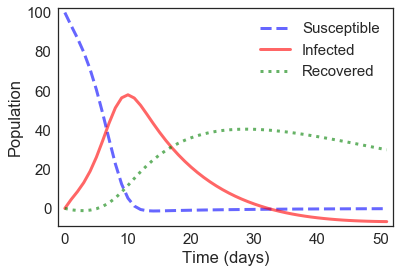

In [57]:
system = make_system()

run_simulation(system, update)

plot_results1(system.Sh, system.Ih, system.Rh)

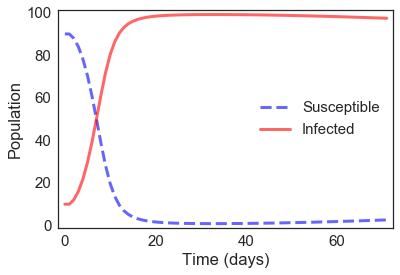

In [49]:
system = make_system()

run_simulation(system, update)

plot_results2(system.Sm, system.Im)